# Particle Swarm Optimization Algorithm (in Python!) 

First of all, let's import the libraries we'll need (remember we are using Python 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp
# import time


%matplotlib inline
plt.style.use('bmh')

We can define and plot the function we want to optimize:

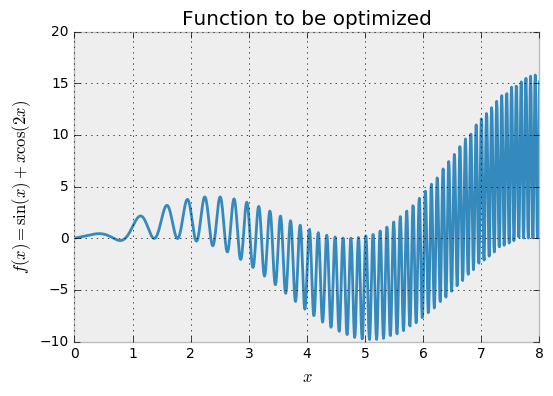

In [2]:
x_lo = 0
x_up = 8
n_points = 1000

x = np.linspace(x_lo, x_up, n_points)

def f(x):
    return x*np.sin(x) + x*np.cos(5*x**2)

y = f(x)

plt.plot(x,y)
plt.ylabel('$f(x) = \sin(x)+x\cos(2x)$')
plt.xlabel('$x$')
plt.title('Function to be optimized')

So we will be using the [Particle Swarm Optimization algorithm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) to obtain the minumum (SPOILER!)
![PSO-1D](img/PSS-Example-1D.gif)

## PSO Initialization

In [3]:
n_particles = 5
n_iterations = 250

x_particles = np.zeros((n_particles, n_iterations))
x_particles[:, 0] = np.random.uniform(x_lo, x_up, size=n_particles)

x_best_particles = np.copy(x_particles[:, 0])

y_particles = f(x_particles[:, 0])
y_best_global = np.min(y_particles[:])
index_best_global = np.argmin(y_particles[:])
x_best_p_global = x_particles[index_best_global,0]

# velocity units are [Length/iteration]
velocity_lo = x_lo-x_up 
velocity_up = x_up-x_lo 

u_particles = np.zeros((n_particles, n_iterations))
u_particles[:, 0] = 0.01*np.random.uniform(velocity_lo, velocity_up, size=n_particles)
v_particles = np.zeros((n_particles, n_iterations)) # For 1D there is no velocity in y direction

## PSO Algorithm

In [10]:
# PSO parameters
#from IPython.core.debugger import Tracer

omega = 0.01
phi_p = 0.01  # particle best weight
phi_g = 0.1  # global global weight

iteration = 1
while iteration <= n_iterations-1:
    for i in range(n_particles):
            x_p = x_particles[i, iteration-1]
            v_p = u_particles[i, iteration-1]
            x_best_p = x_best_particles[i]
            
            
            r_p = np.random.uniform(0, 1)
            r_g = np.random.uniform(0, 1)
            
            v_p_new = omega*v_p + \
                        phi_p*r_p*(x_best_p-x_p) + \
                        phi_g*r_g*(x_best_p_global-x_p)
            
            x_p_new = x_p + v_p_new
            
            if not x_lo <= x_p_new <= x_up: 
                x_p_new = x_p # ignore new position, it's out of the domain
            
            x_particles[i, iteration] = np.copy(x_p_new)
            u_particles[i, iteration] = np.copy(v_p_new)
            
            y_p_best = f(x_best_p)
            y_p_new = f(x_p_new)
            
            
            if y_p_new < y_p_best:
                x_best_particles[i] = x_p_new
                
                y_p_best_global = f(x_best_p_global)
                if y_p_new < y_p_best_global:
                    x_best_p_global = x_p_new
            
    iteration = iteration + 1

In [11]:
x_best_p_global

5.0737880112408238

# Animation

In [12]:
from __future__ import print_function
import ipywidgets as widgets

In [13]:
y_particles = f(x_particles)

In [47]:
def plotPSO(i=0): #iteration
    plt.plot(x,y)
    plt.ylabel('$f(x) = \sin(x)+x\cos(2x)$')
    plt.xlabel('$x$')
    plt.title('Function to be optimized')
    plt.plot(x_particles[:,i],y_particles[:,i], "ro")
    plt.quiver(x_particles[:,i],y_particles[:,i],u_particles[:,i],v_particles[:,i])
    
    tag_particles = range(n_particles)
    
    for j, txt in enumerate(tag_particles):
        plt.annotate(txt, (x_particles[j,i],y_particles[j,i]))



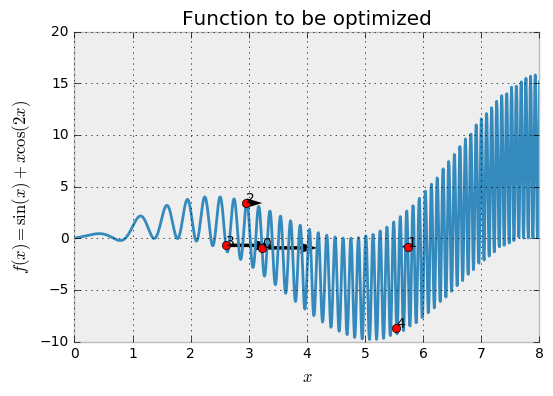

In [48]:
widgets.interact(plotPSO, i=(0,10))